In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from librosa import display
from IPython.display import Audio

sys.path.append('/home/ci411/pcen-t-varying/')

from pcen_t.utils import *

In [2]:
filename = 'soundscape_train_bimodal1798_bedroom'

test_audio_loc = '/beegfs/ci411/pcen/reverb_URBAN-SED/audio/train/{}.wav'.format(filename)
test_pcen_loc = '/beegfs/ci411/pcen/features/pcen/URBAN-SED_reverb/train/{}.h5'.format(filename)
test_pcen_loc2 = '/beegfs/ci411/pcen/features_422/URBAN-SED_bedroom/train/{}.h5'.format(filename)
test_mel_loc = '/beegfs/ci411/pcen/features/mel/URBAN-SED_reverb/train/{}.h5'.format(filename)

In [3]:
audio, sr = lr.load(test_audio_loc)
pcen_data = load_h5(test_pcen_loc)
mel_data = load_h5(test_mel_loc)
pcen_data2 = load_h5(test_pcen_loc2)

In [4]:
Audio(audio, rate=sr)

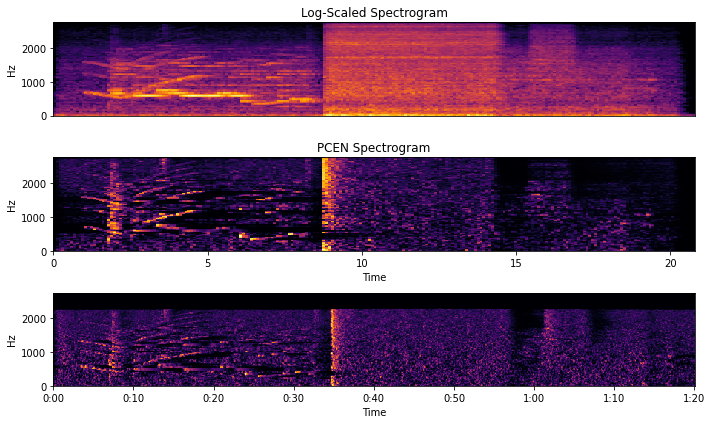

In [5]:
fig, ax = plt.subplots(nrows=3, figsize=(10,6))
lr.display.specshow(mel_data['Mel/mag'][0,:,:,0].T, sr=sr/4, x_axis='time', y_axis='hz', cmap='inferno', ax=ax[0])
lr.display.specshow(pcen_data['PCEN/mag'][0,:,:,3].T, sr=sr/4, x_axis='time', y_axis='hz', cmap='inferno', ax=ax[1])
lr.display.specshow(pcen_data2['PCEN/mag'][0,:,:,3].T, sr=sr/4, x_axis='time', y_axis='hz', cmap='inferno', ax=ax[2])

ax[0].set_title('Log-Scaled Spectrogram')
ax[0].set_xticks([])
ax[0].set_xlabel('')
ax[1].set_title('PCEN Spectrogram')
fig.tight_layout()
plt.show()

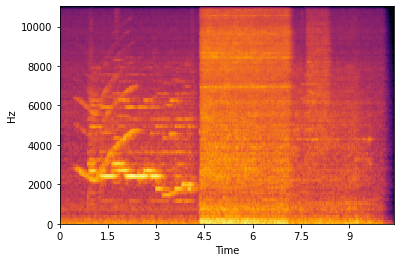

In [19]:
S = lr.feature.melspectrogram(y=audio, sr=sr, n_mels = 128)
lr.display.specshow(np.log(S), sr=sr, x_axis='time', y_axis='hz', cmap='inferno')

In [7]:
pcen_pump_loc = '/beegfs/ci411/pcen/pumps/pcen/pump.pkl'
mel_pump_loc = '/beegfs/ci411/pcen/pumps/mel/pump.pkl'

pcen_pump = load_pump(pcen_pump_loc)
mel_pump = load_pump(mel_pump_loc)

In [8]:
transformed_audio['Mel/mag'][]

SyntaxError: invalid syntax (<ipython-input-8-9274e6e33897>, line 1)

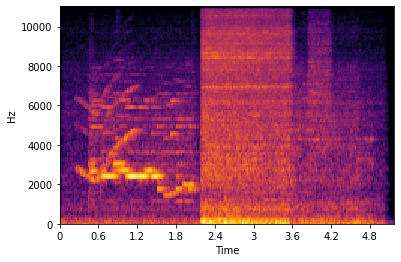

In [93]:
transformed_audio = mel_pump.transform(test_audio_loc)
lr.display.specshow(transformed_audio['Mel/mag'][0,:,:].T, sr=sr, x_axis='time', y_axis='hz', cmap='inferno')

In [83]:
transformed_audio['Mel/mag'].shape

(1, 223, 128)